## QUESTION 1

META DATA: 
- Preg - Number of times pregnant
- Plas - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Pres - Diastolic blood pressure (mm Hg)
- Skin - Triceps skin fold thickness (mm)
- Insu - 2-Hour serum insulin (mu U/ml)
- Mass - Body mass index (weight in kg/(height in m)^2)
- Pedi - Diabetes pedigree function
- age
- class – whether the patient tested positive or negative for diabetes

In [35]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
df = pd.read_csv("C:\\Users\Pravallika Gajul\Downloads\diabetes.csv")
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


#### Q1. What is the percentage of patients who tested positive for diabetes?

In [37]:
diabetes_tested_positive = df['class'].value_counts()['tested_positive']
diabetes_tested_positive

268

In [38]:
df['class'].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [39]:
sum_of_testing=500+268
sum_of_testing

768

In [40]:
percentage_positive=[(diabetes_tested_positive*100)/(sum_of_testing)]
percentage_positive

[34.895833333333336]

#### Q2. Describe the age, visualize using appropriate plot. 

In [41]:
df['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

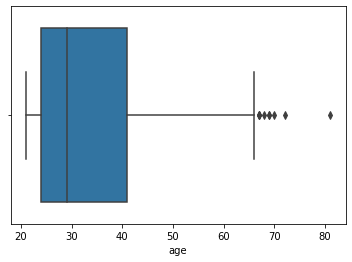

In [42]:
sns.boxplot(df['age'])

#### Q3. Tabulate the Diastolic blood pressure with class (Diabetic or not). 
- Normal diastolic: less than 80 mm Hg
- At Risk (prehypertension) diastolic: 80–89 mm Hg
- High Blood Pressure (hypertension) diastolic: 90 mm Hg or higher
#### Visualize using an appropriate plot.


In [58]:
df['risk']=pd.cut(x=df['pres'], bins=[-1,80,89,200],labels = ['Normal', 'At Risk', 'High Blood Pressure'])
df

,preg,plas,pres,skin,insu,mass,pedi,age,class,risk
0,6,148,72,35,0,33.6,0.627,50,tested_positive,Normal
1,1,85,66,29,0,26.6,0.351,31,tested_negative,Normal
2,8,183,64,0,0,23.3,0.672,32,tested_positive,Normal
3,1,89,66,23,94,28.1,0.167,21,tested_negative,Normal
4,0,137,40,35,168,43.1,2.288,33,tested_positive,Normal
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative,Normal
764,2,122,70,27,0,36.8,0.340,27,tested_negative,Normal
765,5,121,72,23,112,26.2,0.245,30,tested_negative,Normal
766,1,126,60,0,0,30.1,0.349,47,tested_positive,Normal


In [61]:
risk_pressure=df.risk.value_counts().rename_axis('risk').reset_index(name='counts')
risk_pressure

,risk,counts
0,Normal,603
1,At Risk,105
2,High Blood Pressure,60


In [62]:
dfrisk=df[['class','risk']]
dfrisk

,class,risk
0,tested_positive,Normal
1,tested_negative,Normal
2,tested_positive,Normal
3,tested_negative,Normal
4,tested_positive,Normal
...,...,...
763,tested_negative,Normal
764,tested_negative,Normal
765,tested_negative,Normal
766,tested_positive,Normal


([<matplotlib.patches.Wedge at 0x26d91e1bfa0>,
 [Text(-0.858810951429304, 0.687345436956625, 'Normal'),
  Text(0.666062145544758, -0.8754205950697721, 'At Risk'),
  Text(1.0670343785139984, -0.26727819789359064, 'High Blood Pressure')])

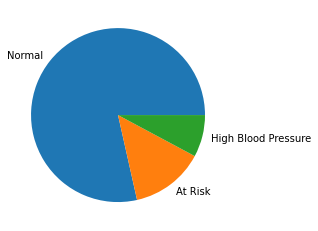

In [63]:
plt.pie(ab.counts, labels=ab.risk)

In [64]:
pd.crosstab(dfrisk['risk'],dfrisk['class'])

class,tested_negative,tested_positive
risk,,
Normal,412,191
At Risk,57,48
High Blood Pressure,31,29


#### Q4. Tabulate the patients age-wise, BMI-wise( underweight,normal, overweight or obese) with respect to the class (Diabetic or not) . Visualize using an appropriate plot (s)

In [67]:
df['BMI']=pd.cut(x=df['mass'], bins=[-1,18,25,30],labels = ['underweight','normal' , 'overweight' ,'obese'])

ValueError: Bin labels must be one fewer than the number of bin edges

#### Q5. Find and list all attributes that are related to class (Diabetic or not) using appropriate tests.

In [71]:
x=df.select_dtypes(include=[np.number])
x.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<AxesSubplot:>

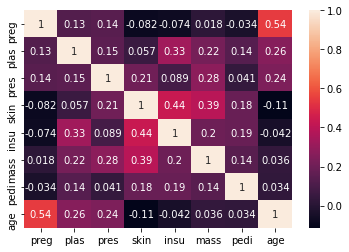

In [72]:
sns.heatmap(c, annot = True)